working on a classification task with a mobile phones dataset using a Naive Bayes classifier. 

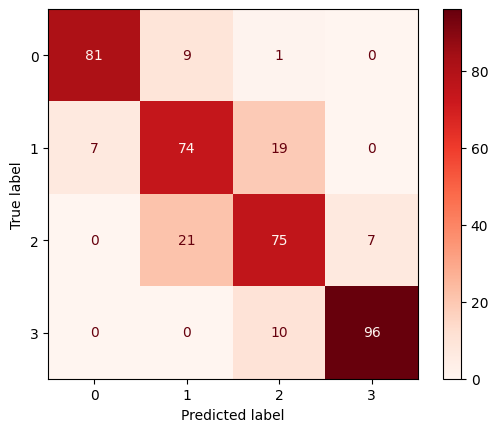

Naive Bayes Accuracy: 0.815


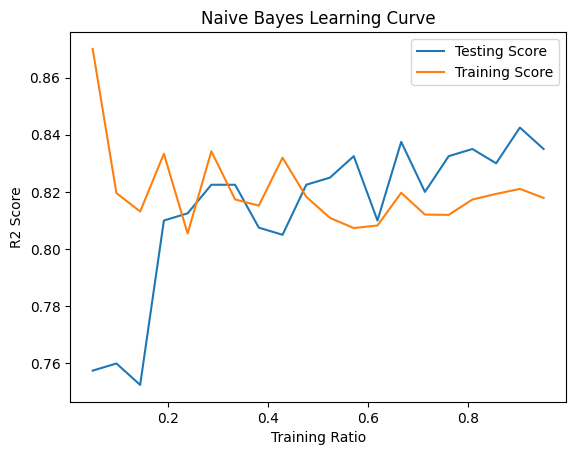

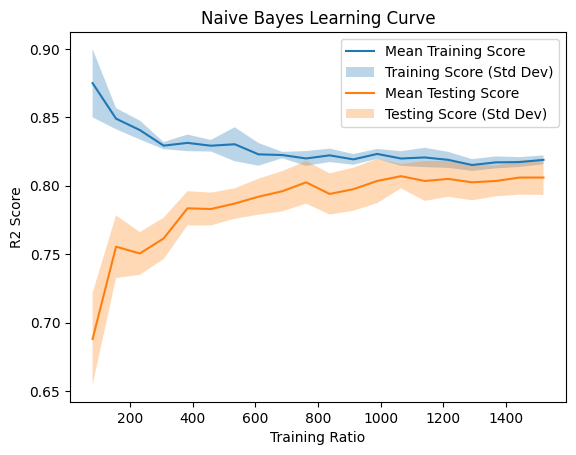

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load data
data = pd.read_csv('mobile_phones.csv')

# Separate features and target
y = data['price_range']
x = data.drop('price_range', axis=1)

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)

# Confusion matrix
y_pred = nb_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred, labels=nb_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb_classifier.classes_)
disp.plot(cmap='Reds')
plt.show()

# Accuracy
accuracy = nb_classifier.score(x_test, y_test)
print('Naive Bayes Accuracy:', accuracy)

# Learning curve via manual iteration
ratios = np.linspace(0.05, 0.95, 20)
test_scores = []
train_scores = []

for ratio in ratios:
    this_x_train, _, this_y_train, _ = train_test_split(x, y, train_size=ratio)
    m = GaussianNB()
    m.fit(this_x_train, this_y_train)
    train_scores.append(m.score(this_x_train, this_y_train))
    test_scores.append(m.score(x_test, y_test))

plt.plot(ratios, test_scores)
plt.plot(ratios, train_scores)
plt.legend(['Testing Score', 'Training Score'])
plt.title('Naive Bayes Learning Curve')
plt.xlabel('Training Ratio')
plt.ylabel('R2 Score')
plt.show()

# Learning curve using sklearn's learning_curve function
train_sizes, train_scores_lc, test_scores_lc = learning_curve(nb_classifier, x, y, train_sizes=ratios)

plt.plot(train_sizes, np.mean(train_scores_lc, axis=1))
plt.fill_between(
    train_sizes,
    np.mean(train_scores_lc, axis=1) - np.std(train_scores_lc, axis=1),
    np.mean(train_scores_lc, axis=1) + np.std(train_scores_lc, axis=1),
    alpha=0.3,
)
plt.plot(train_sizes, np.mean(test_scores_lc, axis=1))
plt.fill_between(
    train_sizes,
    np.mean(test_scores_lc, axis=1) - np.std(test_scores_lc, axis=1),
    np.mean(test_scores_lc, axis=1) + np.std(test_scores_lc, axis=1),
    alpha=0.3,
)
plt.title('Naive Bayes Learning Curve')
plt.xlabel('Training Ratio')
plt.ylabel('R2 Score')
plt.legend(['Mean Training Score', 'Training Score (Std Dev)', 'Mean Testing Score', 'Testing Score (Std Dev)'])
plt.show()
